<img src="Local\imgs\U1\banner_fcd.jpg" alt="banner" width="1100"  height="150">

# <span style="color:black;"><strong>Escalar y Transformar Variables Continuas</strong></span>  
---
<p align="right">
  <a href="https://colab.research.google.com/github/mariabda2/intro_data_2025/blob/main/FCD_U4_Escalar_y_transformar_continuas.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>

## <span style="color:#2F749F;"><strong>🎯 Objetivos de aprendizaje</strong></span>

✅ **Comprender** la relevancia del **escalamiento y la transformación de datos** en el preprocesamiento, y su influencia en el desempeño de los modelos estadísticos y de aprendizaje automático.  

✅ **Diferenciar** las principales **técnicas de escalamiento** (*Min–Max*, *Estandarización*, *Robust Scaling*) y **transformaciones de datos** (*Logarítmica*, *Box–Cox*, *Yeo–Johnson*, *Normalización*) según el tipo y distribución de las variables.  

✅ **Aplicar correctamente** métodos de **escalamiento y transformación** utilizando librerías especializadas de *Python*, asegurando coherencia entre los conjuntos de **entrenamiento y prueba**.  

✅ **Evaluar** el impacto del **escalamiento y la transformación** en la **distribución de las variables** y en el **rendimiento de los modelos**, justificando la elección de cada técnica según el contexto analítico.  
  

# <span style="color:#2F749F;"><strong>Introducción</strong></span>

El **escalamiento y la transformación de datos** constituyen etapas fundamentales dentro del proceso de **preprocesamiento de datos**, cuyo propósito es ajustar la magnitud, la forma y la distribución de las variables numéricas antes de su uso en modelos estadísticos o de aprendizaje automático. Estas operaciones buscan garantizar que las características del conjunto de datos sean **comparables, estables y adecuadas** para los algoritmos que las procesarán ([Han, Kamber, & Pei, 2022](https://doi.org/10.1016/C2020-0-01861-6); [Géron, 2023](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)).

Cuando las variables poseen **escalas diferentes** —por ejemplo, edad en años y salario en millones— o distribuciones muy **asimétricas**, los modelos pueden sesgar su aprendizaje hacia las variables de mayor magnitud o presentar **problemas de convergencia** durante la optimización. Por ello, aplicar técnicas de **escalamiento** (como *Min–Max*, *estandarización* o *robust scaling*) y **transformaciones** (como *logarítmica*, *Box–Cox* o *Yeo–Johnson*) permite mejorar la eficiencia y el rendimiento de los algoritmos.

<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 

<b>El objetivo del escalamiento y la transformación es mejorar la calidad analítica de los datos en términos de:</b>

- **Homogeneidad:** los valores numéricos están en rangos comparables.  
- **Estabilidad:** los modelos aprenden de forma equilibrada, sin dominancia por magnitud.  
- **Normalidad:** las distribuciones se aproximan a formas más simétricas y adecuadas para técnicas estadísticas.  
- **Robustez:** se minimiza la influencia de valores extremos o atípicos.  
- **Eficiencia:** los algoritmos convergen más rápido y de manera más confiable.  

</div>

En síntesis, el **escalamiento y la transformación** son pasos imprescindibles para asegurar la **validez y el desempeño** de los modelos predictivos, permitiendo que las conclusiones derivadas de los análisis sean más precisas y generalizables.


# <span style="color:black;"><strong>1. Escalamiento de Datos</strong></span>

El **escalamiento de datos** es una etapa fundamental del preprocesamiento que busca **ajustar las variables numéricas a una escala común**, reduciendo el impacto de las diferencias de magnitud entre ellas. Este proceso garantiza que todas las características contribuyan de manera equilibrada al modelo, evitando que aquellas con valores más grandes dominen el análisis.

El escalamiento resulta especialmente importante en algoritmos que **se basan en medidas de distancia o gradientes** —como **K-Means**, **SVM**, **Regresión logística** y **Redes neuronales**—, donde las variables no escaladas pueden generar **sesgos en el aprendizaje** o **dificultar la convergencia** del modelo durante el entrenamiento.

En síntesis, escalar los datos permite **mejorar la estabilidad numérica**, **acelerar el proceso de optimización** y **aumentar la precisión de los resultados**, siendo una práctica esencial antes de aplicar técnicas de modelado estadístico o de aprendizaje automático ([Han, Kamber, & Pei, 2022](https://doi.org/10.1016/C2020-0-01861-6); [Géron, 2023](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)).


A continuación, se presentan las técnicas de escalamiento más comunes:




## <span style="color:#2F749F;">**1.1 Escalamiento Min–Max**</span>

El **escalamiento Min–Max** (o *normalización min–max*) transforma los valores de una variable al rango [0, 1] mediante la siguiente fórmula:

$$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

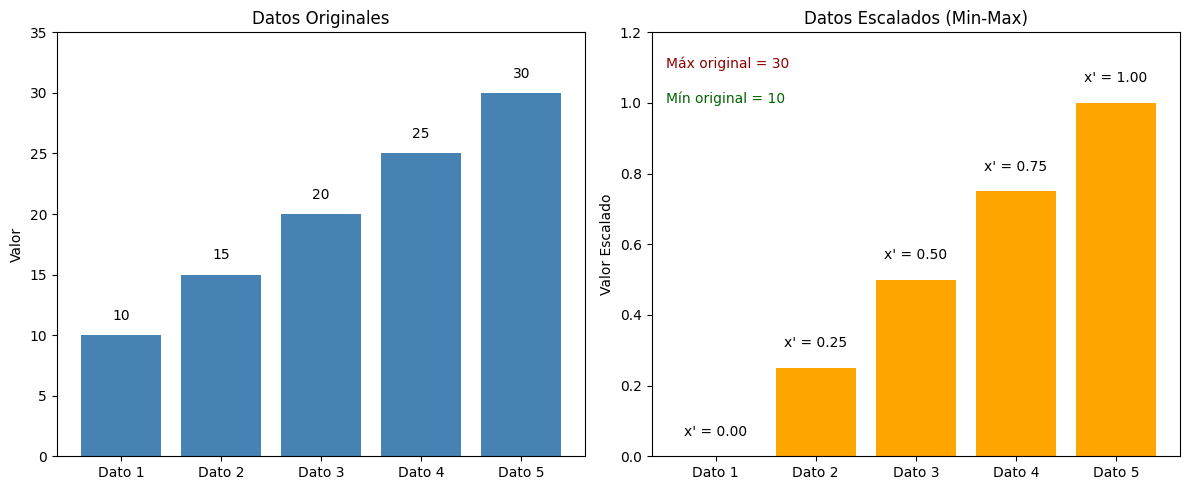

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Datos originales
datos = np.array([[10], [15], [20], [25], [30]])

# Escalamiento Min-Max
scaler = MinMaxScaler()
datos_escalados = scaler.fit_transform(datos)

# Preparar datos para graficar
etiquetas = [f'Dato {i+1}' for i in range(len(datos))]
valores_originales = datos.flatten()
valores_escalados = datos_escalados.flatten()

# Obtener min y max originales
x_min = np.min(valores_originales)
x_max = np.max(valores_originales)

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Datos originales
axs[0].bar(etiquetas, valores_originales, color='steelblue')
axs[0].set_title('Datos Originales')
axs[0].set_ylabel('Valor')
axs[0].set_ylim(0, max(valores_originales) + 5)
for i, val in enumerate(valores_originales):
    axs[0].text(i, val + 1, f'{val}', ha='center', va='bottom', fontsize=10)

# Gráfico 2: Datos escalados con anotaciones
axs[1].bar(etiquetas, valores_escalados, color='orange')
axs[1].set_title('Datos Escalados (Min-Max)')
axs[1].set_ylabel('Valor Escalado')
axs[1].set_ylim(0, 1.2)
for i, val in enumerate(valores_escalados):
    axs[1].text(i, val + 0.05, f"x' = {val:.2f}", ha='center', va='bottom', fontsize=10)

# Anotaciones de min y max
axs[1].text(-0.5, 1.1, f'Máx original = {x_max}', fontsize=10, color='darkred')
axs[1].text(-0.5, 1.0, f'Mín original = {x_min}', fontsize=10, color='darkgreen')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Este método preserva la forma de la distribución original, pero es sensible a los valores atípicos.
</div>

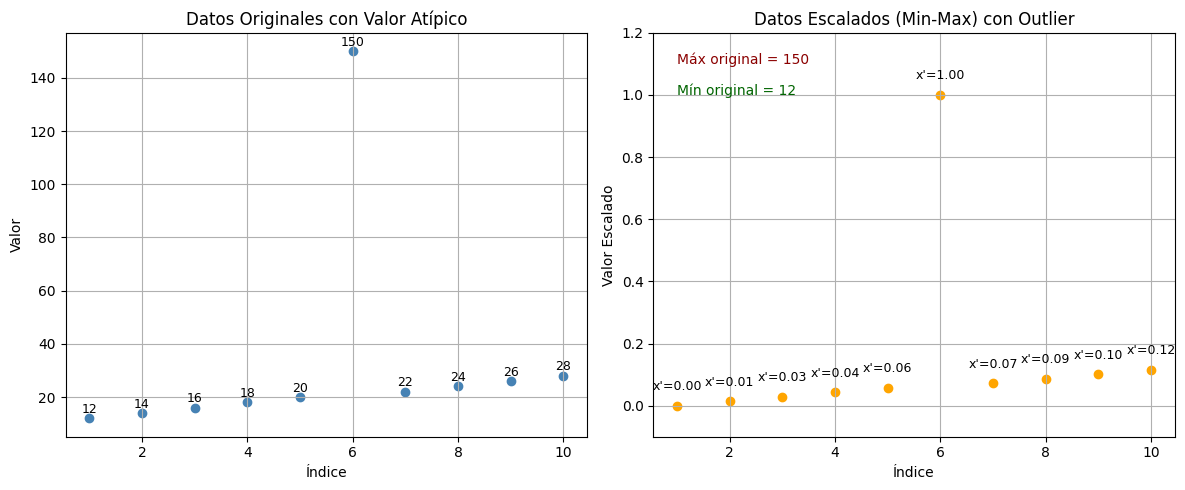

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generar 10 datos con un valor atípico en la posición 6
datos = np.array([[12], [14], [16], [18], [20], [150], [22], [24], [26], [28]])  # 150 es el outlier

# Escalamiento Min-Max
scaler = MinMaxScaler()
datos_escalados = scaler.fit_transform(datos)

# Preparar datos para graficar
indices = np.arange(1, len(datos) + 1)
valores_originales = datos.flatten()
valores_escalados = datos_escalados.flatten()

# Obtener min y max originales
x_min = np.min(valores_originales)
x_max = np.max(valores_originales)

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Datos originales con outlier
axs[0].scatter(indices, valores_originales, color='steelblue')
axs[0].set_title('Datos Originales con Valor Atípico')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Valor')
axs[0].grid(True)
for i, val in enumerate(valores_originales):
    axs[0].text(indices[i], val + 2, f'{val}', ha='center', fontsize=9)

# Gráfico 2: Datos escalados afectados por el outlier
axs[1].scatter(indices, valores_escalados, color='orange')
axs[1].set_title('Datos Escalados (Min-Max) con Outlier')
axs[1].set_xlabel('Índice')
axs[1].set_ylabel('Valor Escalado')
axs[1].set_ylim(-0.1, 1.2)
axs[1].grid(True)
for i, val in enumerate(valores_escalados):
    axs[1].text(indices[i], val + 0.05, f"x'={val:.2f}", ha='center', fontsize=9)

# Anotaciones de min y max
axs[1].text(1, 1.1, f'Máx original = {x_max}', fontsize=10, color='darkred')
axs[1].text(1, 1.0, f'Mín original = {x_min}', fontsize=10, color='darkgreen')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>De los ejercicios anteriores se evidencia que:</b>

- El **valor atípico (150)** estira el rango, haciendo que los demás valores queden comprimidos cerca de 0.
- Aunque la forma general se conserva, los valores escalados pierden resolución.
- Es **sensible a outliers**, lo cual puede afectar la respuesta de los modelos si no se tratan adecuadamente.
</div>


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 

<b>La aplicación de Min-Max es común en modelos que requieren **valores normalizados en un rango definido**.

</div>

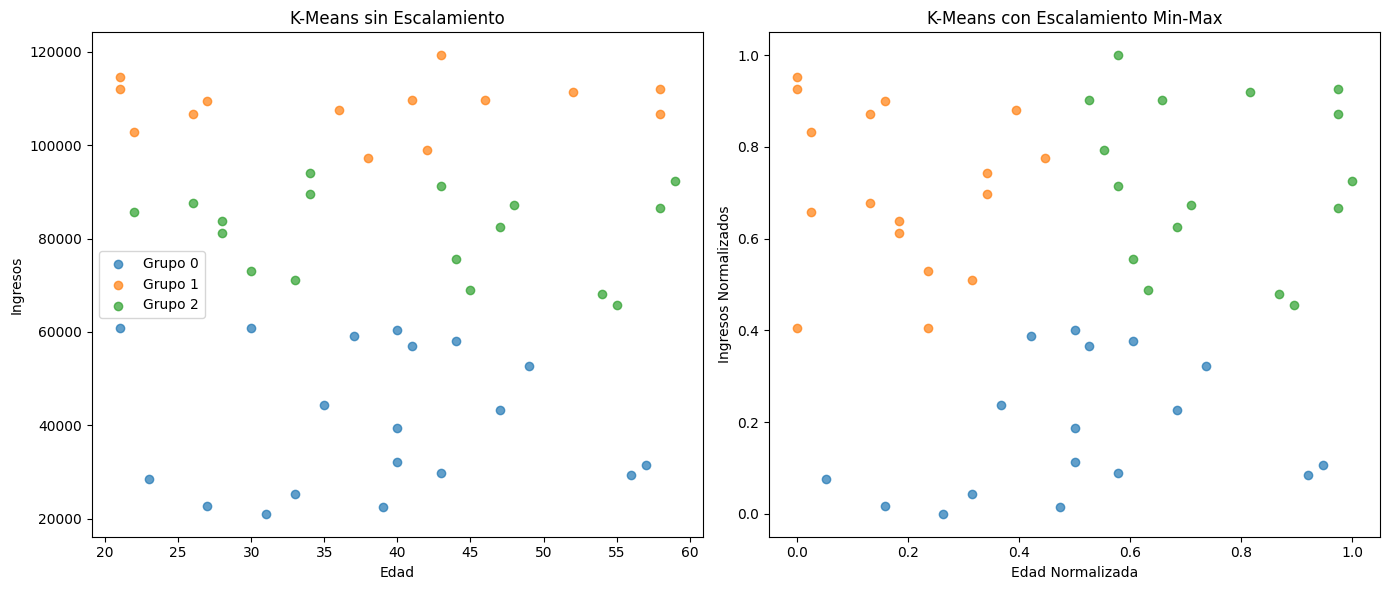

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Simulación de 50 observaciones con dos variables: edad (20–60) e ingresos (20k–120k)
np.random.seed(42)
edad = np.random.randint(20, 60, size=50)
ingresos = np.random.randint(20000, 120000, size=50)
X = np.column_stack((edad, ingresos))

# K-Means sin escalamiento
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(X)

# Escalamiento Min-Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# K-Means con datos escalados
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Colores por clúster
colors = ['tab:blue', 'tab:orange', 'tab:green']
cluster_names = ['Grupo 0', 'Grupo 1', 'Grupo 2']

# Sin escalamiento
for i in range(3):
    cluster_points = X[labels_raw == i]
    axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=cluster_names[i], alpha=0.7)
axs[0].set_title('K-Means sin Escalamiento')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Ingresos')
axs[0].legend()

# Con escalamiento Min-Max
for i in range(3):
    cluster_points = X_scaled[labels_scaled == i]
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=cluster_names[i], alpha=0.7)
axs[1].set_title('K-Means con Escalamiento Min-Max')
axs[1].set_xlabel('Edad Normalizada')
axs[1].set_ylabel('Ingresos Normalizados')

plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Del ejercicio anterior se evidencia que:</b>

**Sin escalar:**
- La variable con mayor magnitud (ingresos) **domina el agrupamiento**.
- Los clústeres se forman principalmente en función de los ingresos.
- La variable edad tiene **poca o nula influencia** en la formación de grupos.

**Escalando con Min-Max**:
- Ambas variables se normalizan al mismo rango \([0, 1]\).
- El algoritmo K-Means **considera edad e ingresos por igual**.
- Los clústeres son **más equilibrados y representativos** de la estructura real de los datos.

> El escalamiento Min-Max es esencial en modelos como **K-Means**, **redes neuronales** y otros algoritmos **basados en distancia**, donde la magnitud de las variables influye directamente en los resultados ([Han, Kamber, & Pei, 2022](https://doi.org/10.1016/C2020-0-01861-6); [Géron, 2023](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)).
</div>

## <span style="color:#2F749F;">**1.2 Estandarización (Z-Score)**</span>

La **estandarización** es una técnica de escalamiento que transforma los valores de una variable para que tengan una **media igual a 0** y una **desviación estándar igual a 1**, utilizando la siguiente fórmula:

$$
x' = \frac{x - \mu}{\sigma}
$$

donde:  
- \( \mu \) es la media de la variable,  
- \( \sigma \) es su desviación estándar.

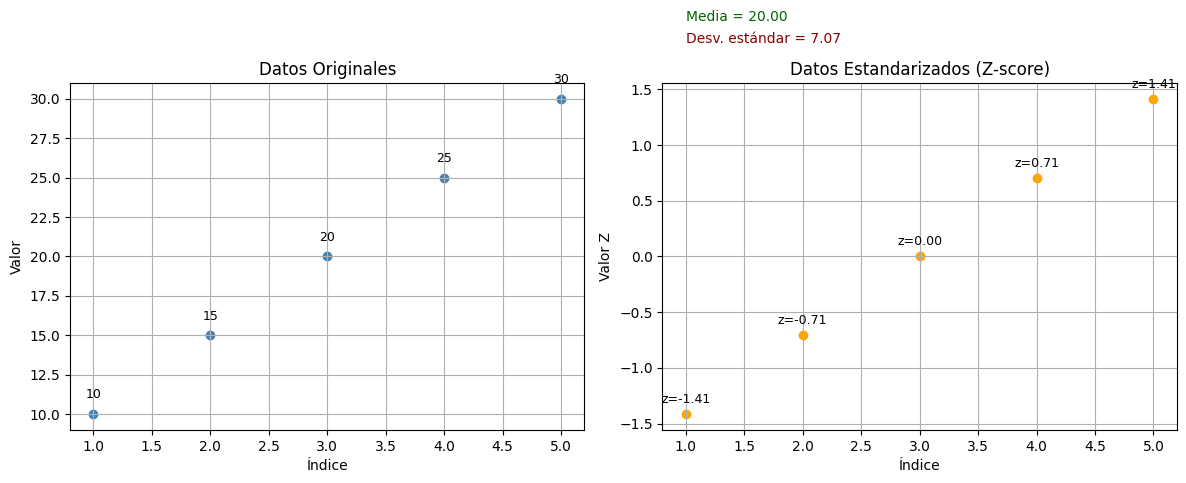

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Datos originales
datos = np.array([[10], [15], [20], [25], [30]])

# Estandarización Z-score
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos)

# Preparar datos para graficar
indices = np.arange(1, len(datos) + 1)
valores_originales = datos.flatten()
valores_zscore = datos_estandarizados.flatten()

# Obtener media y desviación estándar
media = np.mean(valores_originales)
std = np.std(valores_originales)

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Datos originales
axs[0].scatter(indices, valores_originales, color='steelblue')
axs[0].set_title('Datos Originales')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Valor')
axs[0].grid(True)
for i, val in enumerate(valores_originales):
    axs[0].text(indices[i], val + 1, f'{val}', ha='center', fontsize=9)

# Gráfico 2: Datos estandarizados
axs[1].scatter(indices, valores_zscore, color='orange')
axs[1].set_title('Datos Estandarizados (Z-score)')
axs[1].set_xlabel('Índice')
axs[1].set_ylabel('Valor Z')
axs[1].grid(True)
for i, val in enumerate(valores_zscore):
    axs[1].text(indices[i], val + 0.1, f"z={val:.2f}", ha='center', fontsize=9)

# Anotaciones de media y desviación estándar
axs[1].text(1, max(valores_zscore) + 0.7, f'Media = {media:.2f}', fontsize=10, color='darkgreen')
axs[1].text(1, max(valores_zscore) + 0.5, f'Desv. estándar = {std:.2f}', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Este procedimiento es especialmente recomendable cuando: </b> 

- Las variables se expresan en diferentes unidades de medida o magnitudes, ya que permite compararlas en una misma escala. 
- Puede ser **sensible a los valores atípicos**, debido a que la media y la desviación estándar pueden distorsionarse ante su presencia.  
- Su uso facilita la **convergencia de los modelos** y mejora la **interpretación de los coeficientes** en métodos lineales ([Géron, 2023](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/); [Raschka & Mirjalili, 2022](https://www.packtpub.com/product/python-machine-learning-fourth-edition/9781801819312)).
</div>

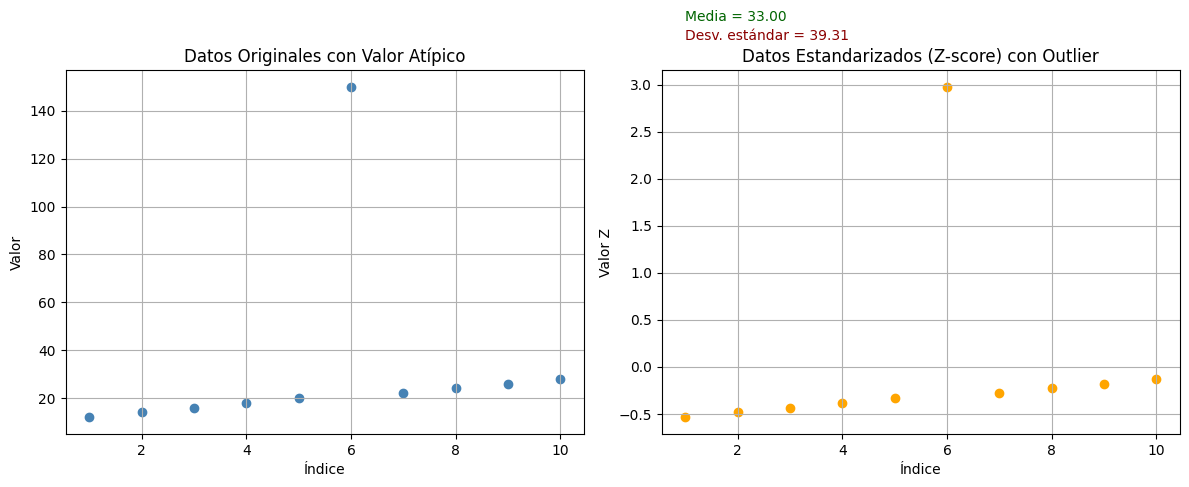

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Datos con un valor atípico en la posición 6
datos = np.array([[12], [14], [16], [18], [20], [150], [22], [24], [26], [28]])  # 150 es el outlier

# Estandarización Z-score
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos)

# Preparar datos para graficar
indices = np.arange(1, len(datos) + 1)
valores_originales = datos.flatten()
valores_zscore = datos_estandarizados.flatten()

# Obtener media y desviación estándar
media = np.mean(valores_originales)
std = np.std(valores_originales)

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Datos originales con outlier
axs[0].scatter(indices, valores_originales, color='steelblue')
axs[0].set_title('Datos Originales con Valor Atípico')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('Valor')
axs[0].grid(True)

# Gráfico 2: Datos estandarizados con outlier
axs[1].scatter(indices, valores_zscore, color='orange')
axs[1].set_title('Datos Estandarizados (Z-score) con Outlier')
axs[1].set_xlabel('Índice')
axs[1].set_ylabel('Valor Z')
axs[1].grid(True)

# Anotaciones de media y desviación estándar
axs[1].text(1, max(valores_zscore) + 0.7, f'Media = {media:.2f}', fontsize=10, color='darkgreen')
axs[1].text(1, max(valores_zscore) + 0.5, f'Desv. estándar = {std:.2f}', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Se evidencia que:</b>

- El valor atípico (150) genera un Z-score muy alto, pero no comprime los demás valores como ocurre con Min-Max.
- Z-score preserva la dispersión relativa de los datos, incluso ante outliers.
</div>

<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Este método es ampliamente utilizado</b> en algoritmos que suponen una distribución normal de los datos o que dependen de distancias y gradientes.  
Al centrar y escalar las variables, la estandarización evita que las de mayor magnitud dominen el proceso de aprendizaje 
<a href="https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html" target="_blank">(Pedregosa et al., 2011)</a>.
</div>


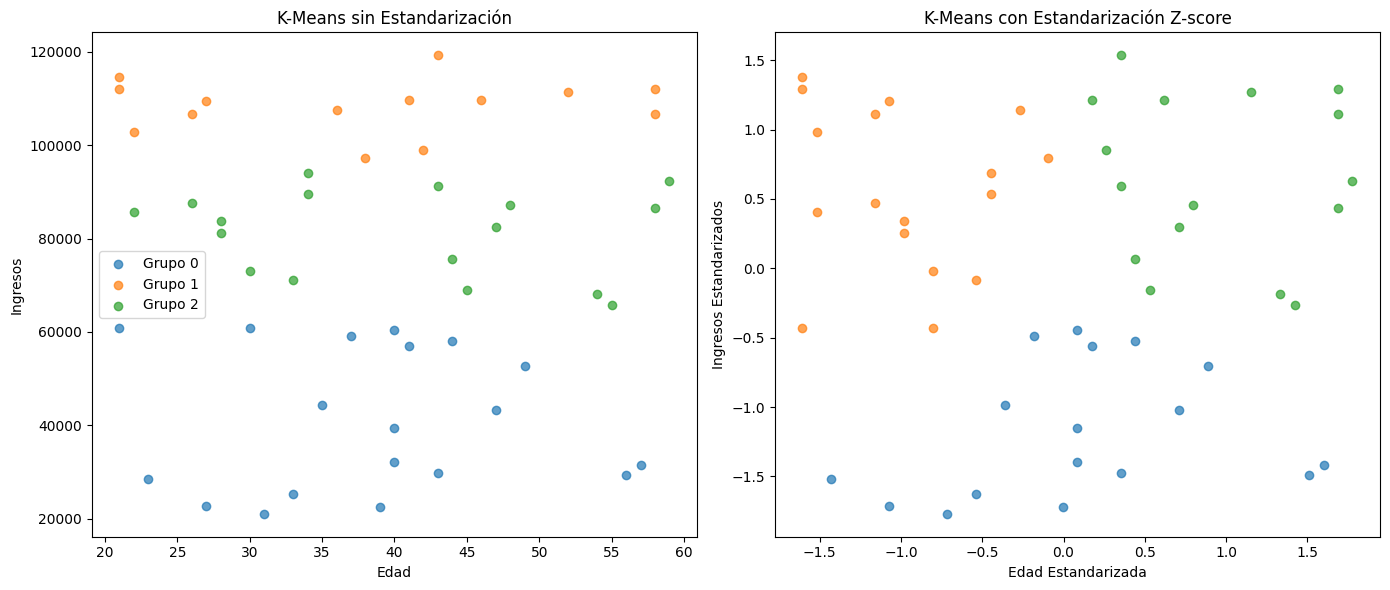

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Simulación de 50 observaciones con dos variables: edad (20–60) e ingresos (20k–120k)
np.random.seed(42)
edad = np.random.randint(20, 60, size=50)
ingresos = np.random.randint(20000, 120000, size=50)
X = np.column_stack((edad, ingresos))

# K-Means sin estandarización
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(X)

# Estandarización Z-score
scaler = StandardScaler()
X_zscore = scaler.fit_transform(X)

# K-Means con datos estandarizados
kmeans_zscore = KMeans(n_clusters=3, random_state=42)
labels_zscore = kmeans_zscore.fit_predict(X_zscore)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Colores por clúster
colors = ['tab:blue', 'tab:orange', 'tab:green']
cluster_names = ['Grupo 0', 'Grupo 1', 'Grupo 2']

# Sin estandarización
for i in range(3):
    cluster_points = X[labels_raw == i]
    axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=cluster_names[i], alpha=0.7)
axs[0].set_title('K-Means sin Estandarización')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Ingresos')
axs[0].legend()

# Con estandarización Z-score
for i in range(3):
    cluster_points = X_zscore[labels_zscore == i]
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=cluster_names[i], alpha=0.7)
axs[1].set_title('K-Means con Estandarización Z-score')
axs[1].set_xlabel('Edad Estandarizada')
axs[1].set_ylabel('Ingresos Estandarizados')

plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Se evidencia que:</b>

- Sin estandarización, los ingresos (por su magnitud) dominan el agrupamiento.
- Con Z-score, ambas variables tienen media 0 y desviación estándar 1, lo que permite que K-Means forme clústeres más equilibrados.
- Esto es útil en modelos sensibles a escala y dispersión, como K-Means, PCA, SVM y redes neuronales.
</div>

## <span style="color:#2F749F;">**1.3 Escalamiento Robusto (Robust Scaling)**</span>

El **escalamiento robusto** es una técnica que busca reducir la influencia de los valores atípicos al emplear **medidas estadísticas resistentes**, como la mediana y el rango intercuartílico (IQR), en lugar de la media y la desviación estándar. 

</b> Su fórmula es la siguiente:

$$
x' = \frac{x - \text{mediana}(x)}{IQR}
$$

donde el **IQR (Interquartile Range)** corresponde a la diferencia entre los percentiles 75 y 25 de la variable.  

El escalamiento robusto conserva la forma general de la distribución, pero centra los datos alrededor de la mediana, garantizando una representación más estable para modelos sensibles a valores extremos como **regresiones lineales** o **análisis de componentes principales** ([Pedregosa et al., 2011](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)).


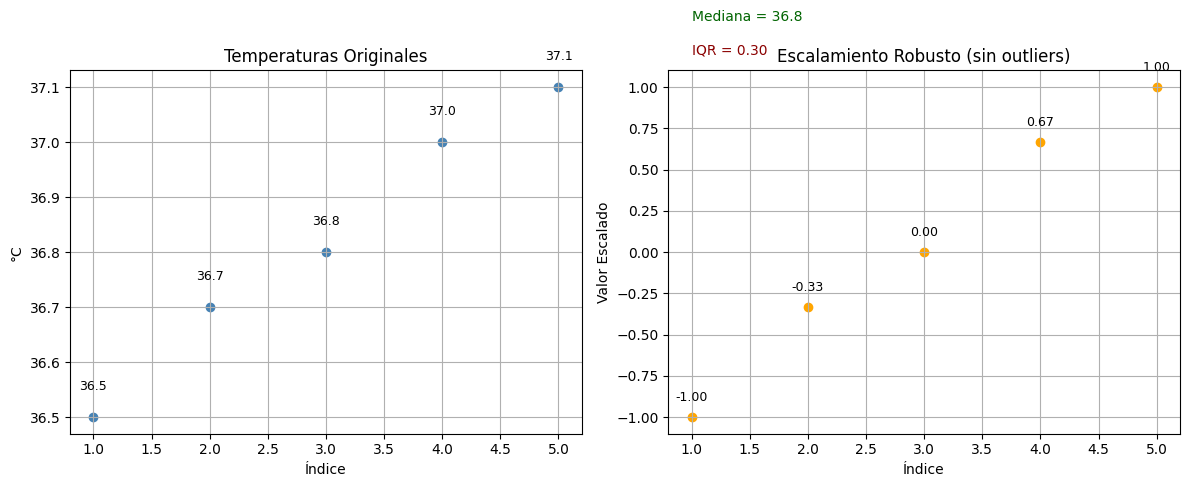

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Datos simulados de temperatura corporal (sin outliers)
datos = np.array([[36.5], [36.7], [36.8], [37.0], [37.1]])

# Escalamiento Robusto
scaler = RobustScaler()
datos_robustos = scaler.fit_transform(datos)

# Preparar datos para graficar
indices = np.arange(1, len(datos) + 1)
valores_originales = datos.flatten()
valores_escalados = datos_robustos.flatten()

# Obtener mediana e IQR
q1 = np.percentile(valores_originales, 25)
q3 = np.percentile(valores_originales, 75)
iqr = q3 - q1
mediana = np.median(valores_originales)

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Datos originales
axs[0].scatter(indices, valores_originales, color='steelblue')
axs[0].set_title('Temperaturas Originales')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('°C')
axs[0].grid(True)
for i, val in enumerate(valores_originales):
    axs[0].text(indices[i], val + 0.05, f'{val}', ha='center', fontsize=9)

# Gráfico 2: Datos escalados
axs[1].scatter(indices, valores_escalados, color='orange')
axs[1].set_title('Escalamiento Robusto (sin outliers)')
axs[1].set_xlabel('Índice')
axs[1].set_ylabel('Valor Escalado')
axs[1].grid(True)
for i, val in enumerate(valores_escalados):
    axs[1].text(indices[i], val + 0.1, f"{val:.2f}", ha='center', fontsize=9)

# Anotaciones
axs[1].text(1, max(valores_escalados) + 0.4, f'Mediana = {mediana}', fontsize=10, color='darkgreen')
axs[1].text(1, max(valores_escalados) + 0.2, f'IQR = {iqr:.2f}', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()


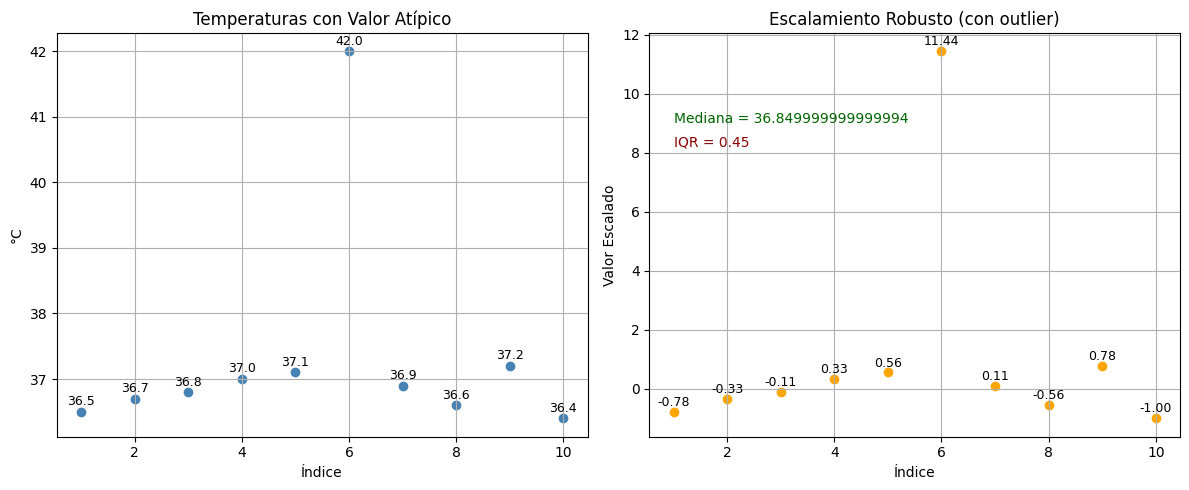

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

# Datos simulados de temperatura corporal con un outlier (hipertermia)
datos = np.array([[36.5], [36.7], [36.8], [37.0], [37.1], [42.0], [36.9], [36.6], [37.2], [36.4]])  # 42.0 es el outlier

# Escalamiento Robusto
scaler = RobustScaler()
datos_robustos = scaler.fit_transform(datos)

# Preparar datos para graficar
indices = np.arange(1, len(datos) + 1)
valores_originales = datos.flatten()
valores_escalados = datos_robustos.flatten()

# Obtener mediana e IQR
q1 = np.percentile(valores_originales, 25)
q3 = np.percentile(valores_originales, 75)
iqr = q3 - q1
mediana = np.median(valores_originales)

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Datos originales con outlier
axs[0].scatter(indices, valores_originales, color='steelblue')
axs[0].set_title('Temperaturas con Valor Atípico')
axs[0].set_xlabel('Índice')
axs[0].set_ylabel('°C')
axs[0].grid(True)
for i, val in enumerate(valores_originales):
    axs[0].text(indices[i], val + 0.1, f'{val}', ha='center', fontsize=9)

# Gráfico 2: Datos escalados con RobustScaler
axs[1].scatter(indices, valores_escalados, color='orange')
axs[1].set_title('Escalamiento Robusto (con outlier)')
axs[1].set_xlabel('Índice')
axs[1].set_ylabel('Valor Escalado')
axs[1].grid(True)
for i, val in enumerate(valores_escalados):
    axs[1].text(indices[i], val + 0.2, f"{val:.2f}", ha='center', fontsize=9)

# Anotaciones
axs[1].text(1, max(valores_escalados)*0.7 + 1, f'Mediana = {mediana}', fontsize=10, color='darkgreen')
axs[1].text(1, max(valores_escalados)*0.7 + 0.2, f'IQR = {iqr:.2f}', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Se evidencia que:</b>

- El escalamiento robusto preserva la forma de los datos sin que el outlier (42.0 °C) distorsione el rango.
- A diferencia de la estandarización tradicional, este método no se ve afectado por la presencia de **outliers**, lo que lo hace especialmente útil cuando los datos presentan distribuciones sesgadas o colas largas.  
</div>

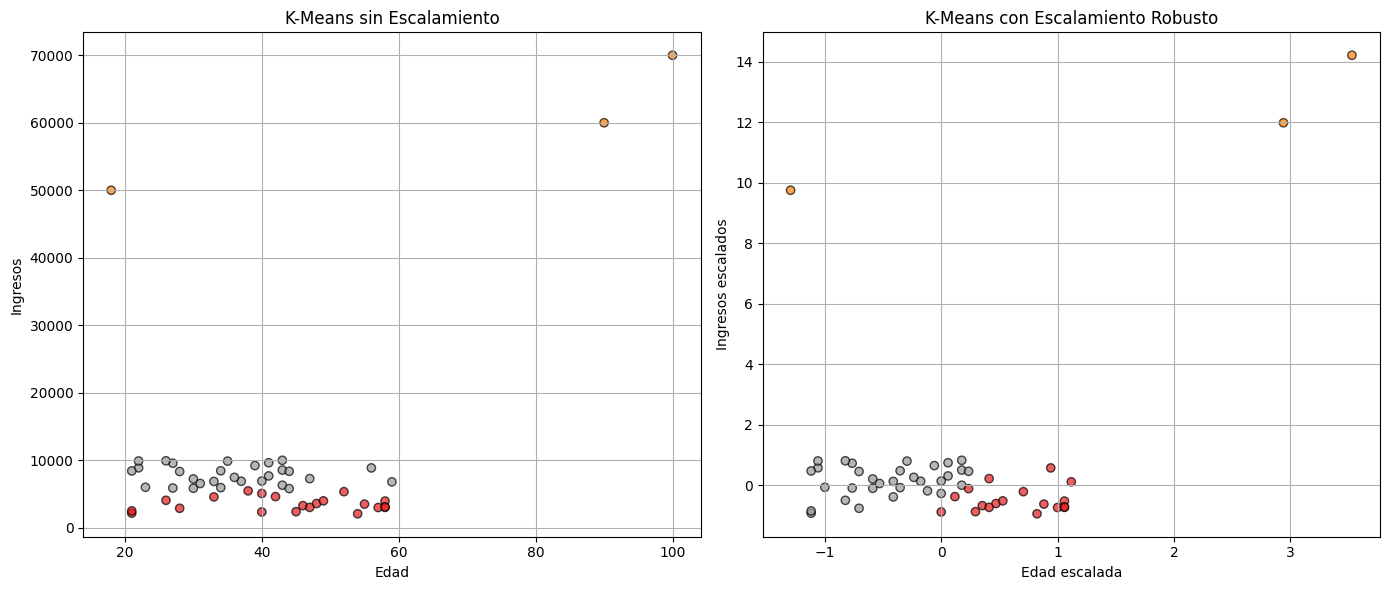

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# Datos simulados
np.random.seed(42)

# Variable 1: edad (escala pequeña)
edad = np.random.randint(20, 60, size=50)

# Variable 2: ingresos (escala grande)
ingresos = np.random.randint(2000, 10000, size=50)

# Outliers extremos
edad_outliers = np.array([18, 90, 100])
ingresos_outliers = np.array([50000, 60000, 70000])

# Combinar datos
X = np.column_stack((np.concatenate([edad, edad_outliers]),
                     np.concatenate([ingresos, ingresos_outliers])))

# K-Means sin escalamiento
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(X)

# Escalamiento robusto
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# K-Means con escalamiento robusto
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Sin escalamiento
axs[0].scatter(X[:, 0], X[:, 1], c=labels_raw, cmap='Set1', edgecolor='k', alpha=0.7)
axs[0].set_title('K-Means sin Escalamiento')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Ingresos')
axs[0].grid(True)

# Con escalamiento robusto
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled, cmap='Set1', edgecolor='k', alpha=0.7)
axs[1].set_title('K-Means con Escalamiento Robusto')
axs[1].set_xlabel('Edad escalada')
axs[1].set_ylabel('Ingresos escalados')
axs[1].grid(True)

plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Se evidencia que:</b>

- **Sin escalamiento:** los ingresos (por tener mayor magnitud) dominan el agrupamiento. Los clústeres se forman casi exclusivamente por ingresos.
- **Con escalamiento robusto:** edad e ingresos tienen igual peso. Los clústeres se distribuyen más equilibradamente, ignorando los outliers.
</div>

## <span style="color:#2F749F;">**1.4 Normalización L1 y L2**</span>

A diferencia de los métodos anteriores, la **normalización L1 y L2** actúa **por fila (observación)** y no por columna (variable). Su objetivo es **ajustar la escala de cada observación** de forma que su longitud (o norma) sea igual a 1, lo cual es especialmente útil en modelos donde las magnitudes relativas entre características deben mantenerse constantes, como en el análisis de texto o aprendizaje profundo.  

Las dos variantes principales son:

- **L1 (Norma de Manhattan).** Escala los valores de cada observación de modo que la suma de los valores absolutos sea igual a 1:

$$
\sum |x_i| = 1
$$

- **L2 (Norma Euclidiana).** Escala los valores de cada observación de modo que la suma de los cuadrados sea igual a 1:

$$
\sum x_i^2 = 1
$$


La **normalización L1** tiende a producir vectores dispersos (con más ceros), mientras que la **L2** conserva mejor la estructura global de los datos.  

Estas técnicas se aplican ampliamente en contextos de **procesamiento de lenguaje natural (NLP)**, **regresión regularizada** y **modelos basados en distancia**, utilizando herramientas como `Normalizer` de *scikit-learn* ([Pedregosa et al., 2011](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html)).


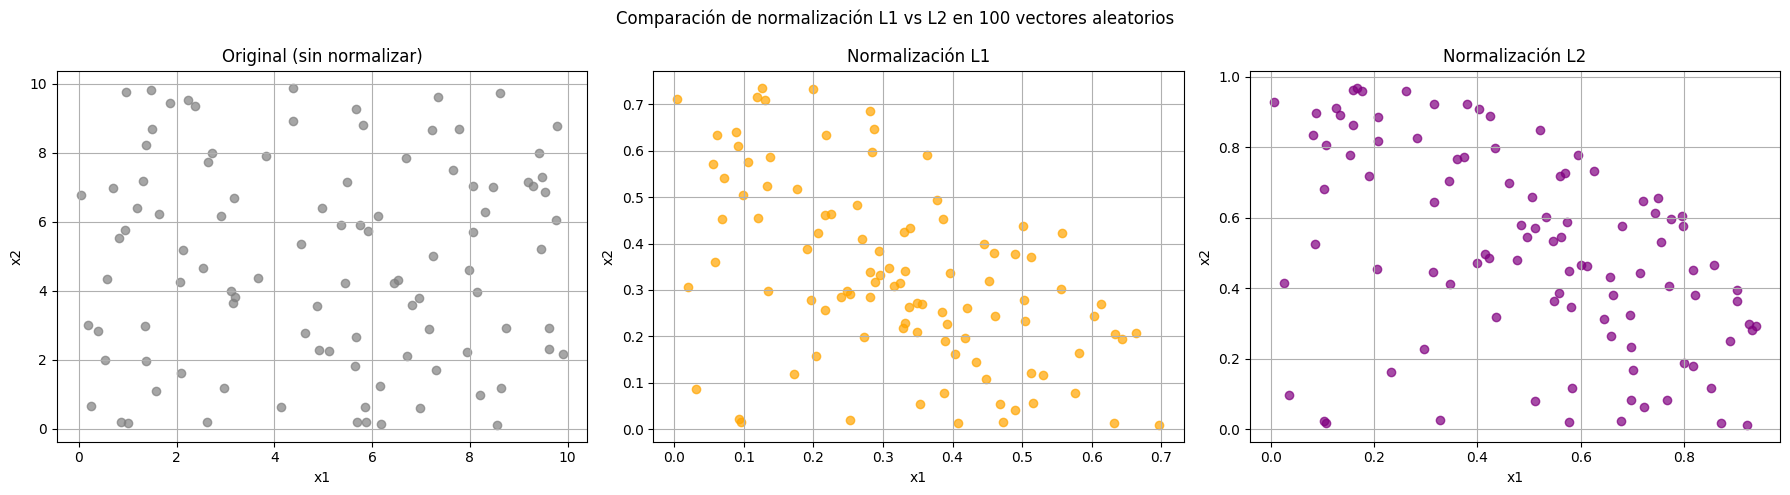

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

# Generar 100 vectores aleatorios de 3 dimensiones
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # valores entre 0 y 10

# Normalización L1
normalizador_l1 = Normalizer(norm='l1')
X_l1 = normalizador_l1.transform(X)

# Normalización L2
normalizador_l2 = Normalizer(norm='l2')
X_l2 = normalizador_l2.transform(X)

# Gráfica comparativa
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Original
axs[0].scatter(X[:, 0], X[:, 1], color='gray', alpha=0.7)
axs[0].set_title('Original (sin normalizar)')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].grid(True)

# L1
axs[1].scatter(X_l1[:, 0], X_l1[:, 1], color='orange', alpha=0.7)
axs[1].set_title('Normalización L1')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].grid(True)

# L2
axs[2].scatter(X_l2[:, 0], X_l2[:, 1], color='purple', alpha=0.7)
axs[2].set_title('Normalización L2')
axs[2].set_xlabel('x1')
axs[2].set_ylabel('x2')
axs[2].grid(True)

plt.suptitle('Comparación de normalización L1 vs L2 en 100 vectores aleatorios')
plt.tight_layout()
plt.show()


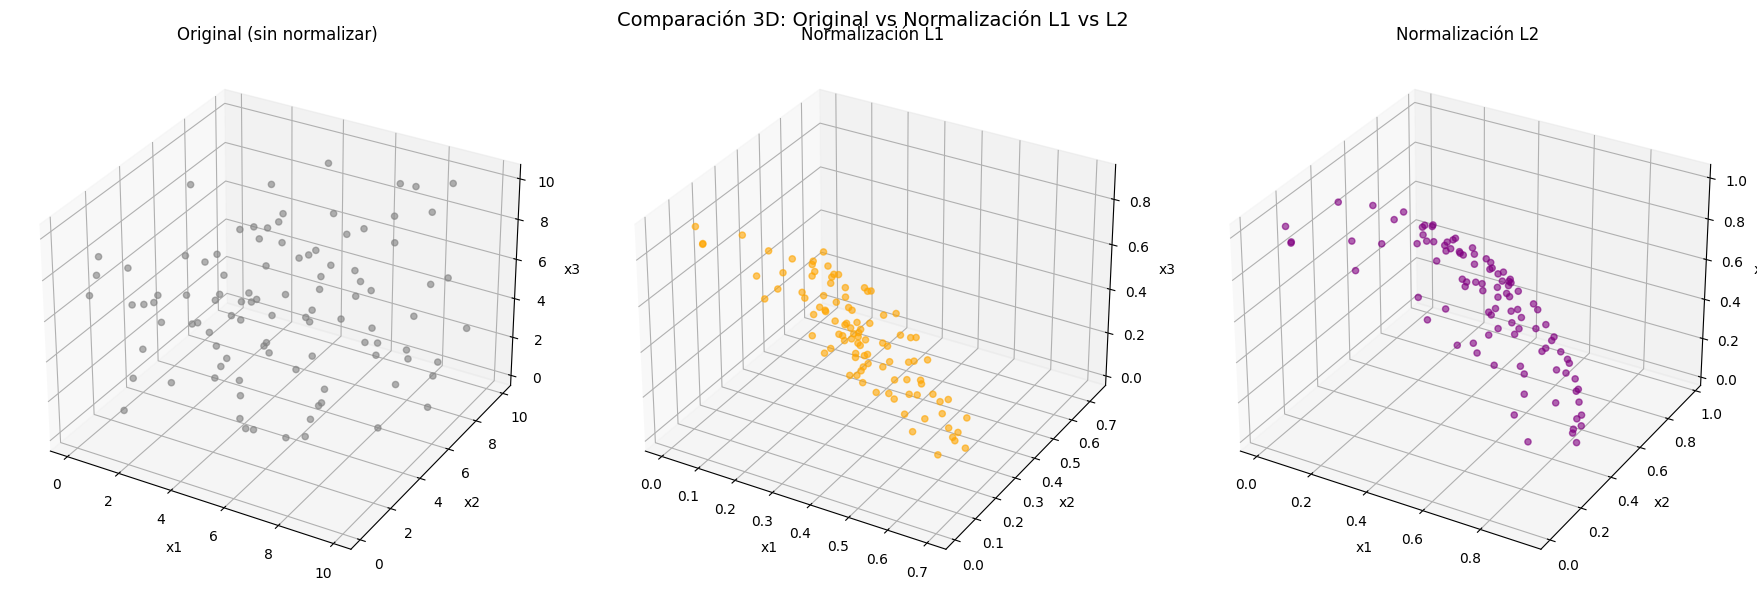

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from mpl_toolkits.mplot3d import Axes3D

# Generar 100 vectores aleatorios de 3 dimensiones
np.random.seed(0)
X = np.random.rand(100, 3) * 10  # valores entre 0 y 10

# Normalización L1
normalizador_l1 = Normalizer(norm='l1')
X_l1 = normalizador_l1.transform(X)

# Normalización L2
normalizador_l2 = Normalizer(norm='l2')
X_l2 = normalizador_l2.transform(X)

# Crear figura con subgráficas 3D
fig = plt.figure(figsize=(18, 6))

# Original
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], color='gray', alpha=0.6)
ax1.set_title('Original (sin normalizar)')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('x3')

# L1
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_l1[:, 0], X_l1[:, 1], X_l1[:, 2], color='orange', alpha=0.6)
ax2.set_title('Normalización L1')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('x3')

# L2
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_l2[:, 0], X_l2[:, 1], X_l2[:, 2], color='purple', alpha=0.6)
ax3.set_title('Normalización L2')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('x3')

plt.suptitle('Comparación 3D: Original vs Normalización L1 vs L2', fontsize=14)
plt.tight_layout()
plt.show()


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Se evidencia que:</b>

- **Original:** los vectores tienen magnitudes y direcciones variadas.
- **Normalización L1:** los vectores se proyectan sobre una forma similar a un octaedro (la “bola L1”), ya que la suma de los valores absolutos de cada vector es 1.
- **Normalización L2:** los vectores se proyectan sobre la superficie de una esfera unitaria (la “bola L2”), ya que su longitud euclidiana es 1.
</div>

# <span style="color:black;"><strong>2. Transformación de Datos</strong></span>

La **transformación de datos** consiste en aplicar funciones matemáticas o estadísticas sobre las variables con el fin de **modificar su escala, distribución o relación entre características**, mejorando así la interpretación y el rendimiento de los modelos analíticos o predictivos.  

Este proceso es esencial cuando los datos **no cumplen los supuestos de normalidad, linealidad o homocedasticidad**, o cuando se desea **reducir la influencia de valores extremos y sesgos** en los resultados. La transformación facilita también la comparación entre variables heterogéneas y contribuye a estabilizar la varianza del conjunto de datos ([Han, Kamber, & Pei, 2022](https://doi.org/10.1016/C2020-0-01861-6); [Géron, 2023](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)).  

<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Entre los propósitos principales de la transformación de datos se encuentran:</b>  

- **Reducir la asimetría o sesgo** en la distribución.  
- **Estabilizar la varianza** de las variables.  
- **Linealizar relaciones** entre variables predictoras y objetivo.  
- **Mejorar la interpretabilidad** y la eficiencia computacional.  
- **Facilitar el cumplimiento de supuestos estadísticos** en modelos lineales y de regresión.  
</div>

Las transformaciones pueden ser **lineales** (como la estandarización o escalamiento) o **no lineales** (como las transformaciones logarítmica, raíz cuadrada o Box–Cox). La selección adecuada depende de la **naturaleza de los datos y el tipo de análisis** que se desee realizar.



## <span style="color:#2F749F;">**2.1 Transformación Logarítmica**</span>

La **transformación logarítmica** es una técnica clásica utilizada para **reducir la asimetría positiva** (sesgo a la derecha) en distribuciones donde existen valores muy grandes en comparación con el resto de los datos.  
Se aplica típicamente a variables **positivas y continuas**, como ingresos, precios o conteos.

La fórmula general es:

$$
x' = \log(x + c)
$$

donde \( c \) es una constante positiva que permite evitar el logaritmo de cero o valores negativos.  

Esta transformación **comprime los valores grandes** y **expande los pequeños**, estabilizando la varianza y favoreciendo la aproximación a una distribución normal. Es ampliamente utilizada antes de aplicar modelos lineales o regresiones logarítmicas ([Weisberg, 2014](https://doi.org/10.1002/9781118884110); [Géron, 2023](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)).



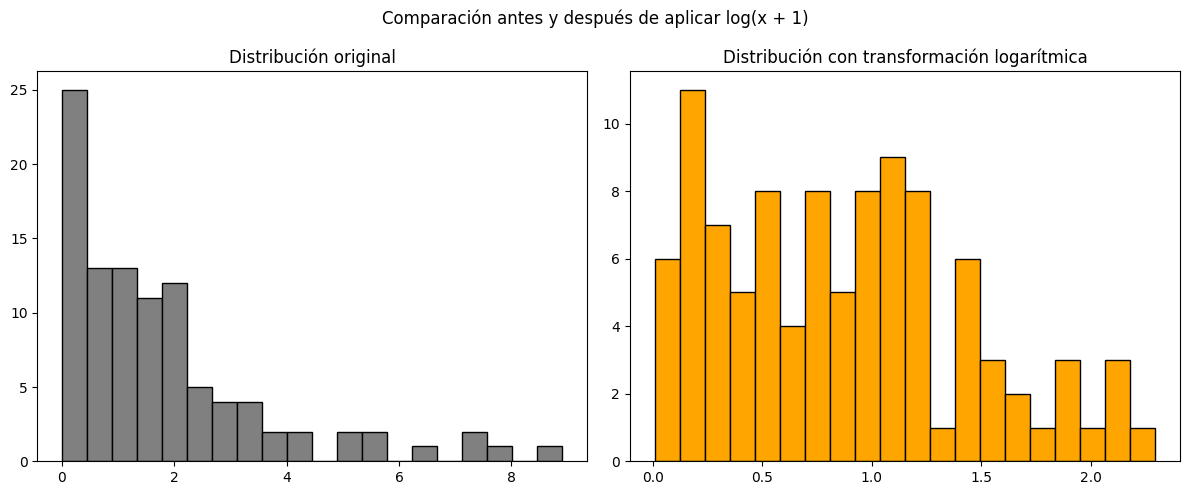

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados con sesgo positivo
np.random.seed(0)
x = np.random.exponential(scale=2.0, size=100)

# Transformación logarítmica
x_log = np.log(x + 1)

# Comparación visual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=20, color='gray', edgecolor='black')
plt.title('Distribución original')

plt.subplot(1, 2, 2)
plt.hist(x_log, bins=20, color='orange', edgecolor='black')
plt.title('Distribución con transformación logarítmica')

plt.suptitle('Comparación antes y después de aplicar log(x + 1)')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>¿Cuándo se usa?</b>

Cuando los datos tienen una distribución sesgada a la derecha (muchos valores pequeños y pocos muy grandes).

</div>

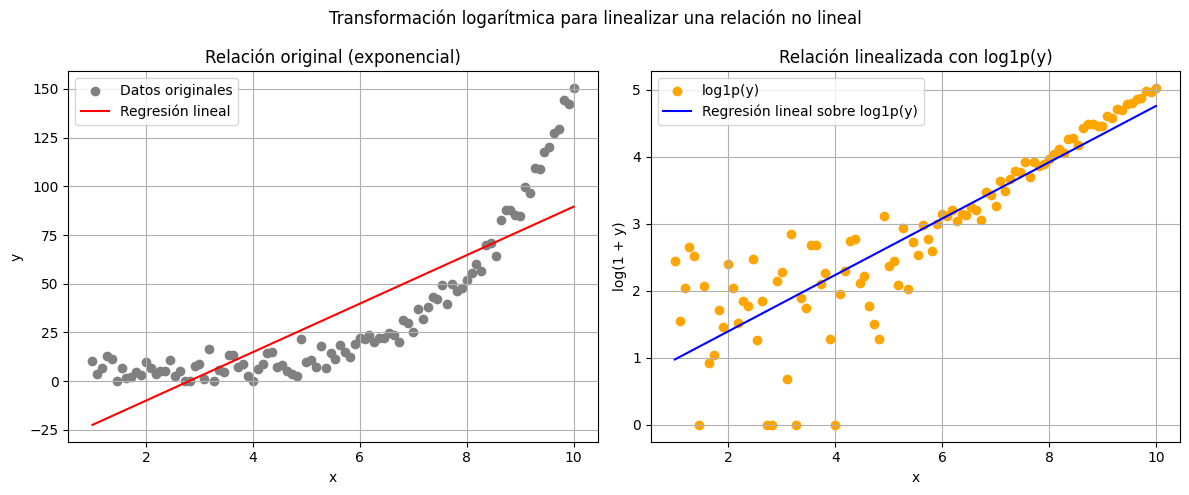

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos simulados: relación exponencial
np.random.seed(0)
x = np.linspace(1, 10, 100).reshape(-1, 1)
y = np.exp(0.5 * x).ravel() + np.random.normal(scale=5, size=100)  # y = exp(0.5x) + ruido

# Asegurar que y > 0 para aplicar log
y = np.clip(y, a_min=1e-6, a_max=None)  # reemplaza valores <= 0 por un mínimo positivo

# Transformación logarítmica segura
y_log = np.log1p(y)

# Ajuste de regresión lineal sobre datos originales
modelo_original = LinearRegression()
modelo_original.fit(x, y)
y_pred_original = modelo_original.predict(x)

# Ajuste de regresión lineal sobre log(y)
modelo_log = LinearRegression()
modelo_log.fit(x, y_log)
y_pred_log = modelo_log.predict(x)

# Gráficas
plt.figure(figsize=(12, 5))

# Relación original
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='gray', label='Datos originales')
plt.plot(x, y_pred_original, color='red', label='Regresión lineal')
plt.title('Relación original (exponencial)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Relación transformada
plt.subplot(1, 2, 2)
plt.scatter(x, y_log, color='orange', label='log1p(y)')
plt.plot(x, y_pred_log, color='blue', label='Regresión lineal sobre log1p(y)')
plt.title('Relación linealizada con log1p(y)')
plt.xlabel('x')
plt.ylabel('log(1 + y)')
plt.legend()
plt.grid(True)

plt.suptitle('Transformación logarítmica para linealizar una relación no lineal')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>¿Cuándo se usa?</b>

- Para linealizar relaciones no lineales entre variables.
- La relación original entre `x` y `y` es exponencial, por lo que una regresión lineal no se ajusta bien.
- Al aplicar `log(y)`, la relación se vuelve aproximadamente lineal, y la regresión lineal se ajusta mucho mejor.

</div>

Modelo sin transformación:     MSE = 11892.21, R² = 0.611
Modelo con log1p(y):           MSE = 13108.46, R² = 0.572


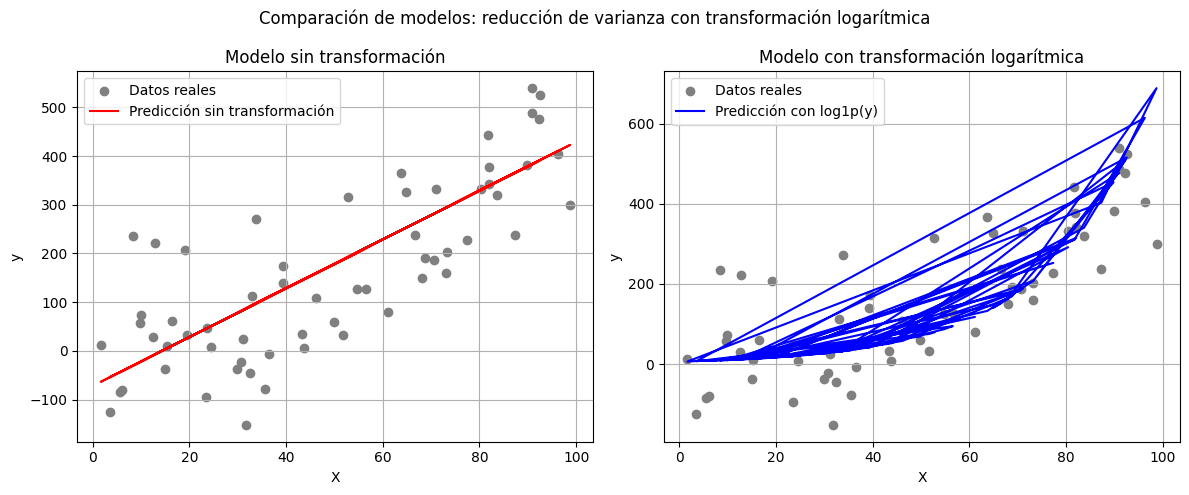

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Simular datos con alta varianza en y
np.random.seed(42)
n = 200
X = np.random.uniform(1, 100, size=(n, 1))
y = 0.05 * X.ravel() ** 2 + np.random.normal(0, 100, size=n)  # relación cuadrática + ruido

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo sin transformación
modelo_original = LinearRegression()
modelo_original.fit(X_train, y_train)
y_pred_orig = modelo_original.predict(X_test)

# Modelo con transformación logarítmica de y
y_train_log = np.log1p(y_train.clip(min=0))  # evitar log de valores negativos
modelo_log = LinearRegression()
modelo_log.fit(X_train, y_train_log)
y_pred_log = modelo_log.predict(X_test)
y_pred_log_inv = np.expm1(y_pred_log)  # revertir log1p para comparar en escala original

# Evaluación
mse_orig = mean_squared_error(y_test, y_pred_orig)
mse_log = mean_squared_error(y_test, y_pred_log_inv)
r2_orig = r2_score(y_test, y_pred_orig)
r2_log = r2_score(y_test, y_pred_log_inv)

# Resultados
print(f"Modelo sin transformación:     MSE = {mse_orig:.2f}, R² = {r2_orig:.3f}")
print(f"Modelo con log1p(y):           MSE = {mse_log:.2f}, R² = {r2_log:.3f}")

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='gray', label='Datos reales')
plt.plot(X_test, y_pred_orig, color='red', label='Predicción sin transformación')
plt.title('Modelo sin transformación')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='gray', label='Datos reales')
plt.plot(X_test, y_pred_log_inv, color='blue', label='Predicción con log1p(y)')
plt.title('Modelo con transformación logarítmica')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.suptitle('Comparación de modelos: reducción de varianza con transformación logarítmica')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>¿Cuándo se usa?</b>

La transformación logarítmica reduce la varianza en `y`, lo que puede mejorar el ajuste del modelo

</div>

## <span style="color:#2F749F;">**2.2 Transformación Box–Cox**</span>

La **transformación Box–Cox** es una técnica **paramétrica** que busca **normalizar distribuciones sesgadas** mediante un parámetro \(\lambda\), el cual se estima para maximizar la verosimilitud del conjunto de datos transformado.

Se define como:

$$
y^\lambda =
\begin{cases}
\frac{y^\lambda - 1}{\lambda}, & \text{si } \lambda \neq 0 \\
\log(y), & \text{si } \lambda = 0
\end{cases}
$$

Esta transformación solo puede aplicarse a **valores positivos** y es muy útil para cumplir los **supuestos de normalidad y homocedasticidad** en modelos estadísticos ([Box & Cox, 1964](https://doi.org/10.1111/j.2517-6161.1964.tb00553.x)).

**Parámetro \(\lambda\):**
- λ = 1 → no hay transformación (identidad)
- λ = 0 → logaritmo natural
- Otros valores de λ → diferentes grados de compresión o expansión


Lambda óptimo de Box-Cox: 0.271
R² sin transformación: 0.884
R² con Box-Cox en X:     0.704


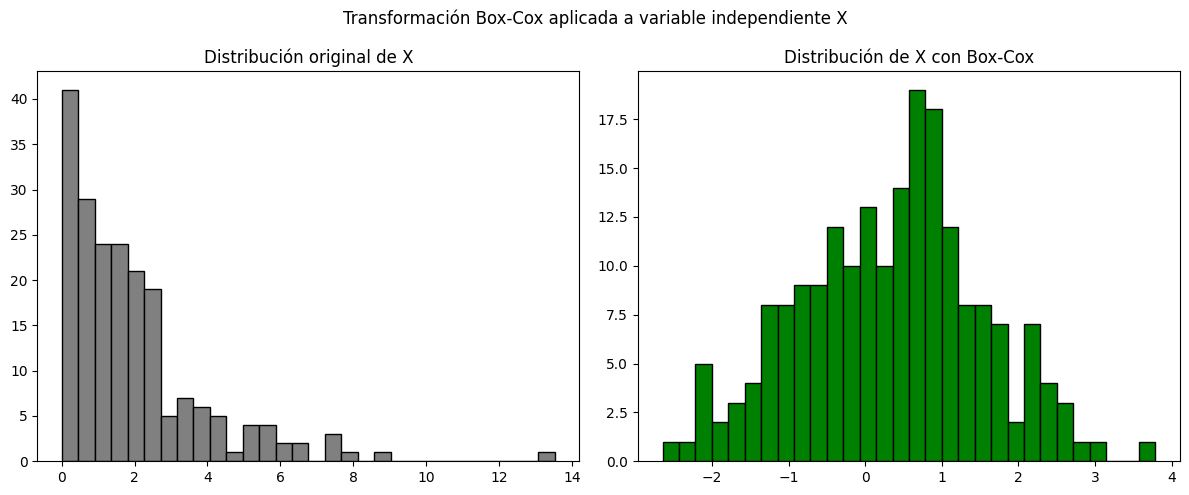

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Simular datos con sesgo en X
np.random.seed(0)
n = 200
X_raw = np.random.exponential(scale=2.0, size=(n, 1))  # variable sesgada positivamente
X_bc, lambda_bc = boxcox(X_raw.ravel())                # aplicar Box-Cox
X_bc = X_bc.reshape(-1, 1)

# Variable dependiente con relación lineal + ruido
y = 3 * X_raw.ravel() + np.random.normal(0, 2, size=n)

# Dividir datos
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)
X_train_bc, X_test_bc, _, _ = train_test_split(X_bc, y, test_size=0.3, random_state=42)

# Modelos
modelo_raw = LinearRegression().fit(X_train_raw, y_train)
modelo_bc = LinearRegression().fit(X_train_bc, y_train)

# Predicciones
y_pred_raw = modelo_raw.predict(X_test_raw)
y_pred_bc = modelo_bc.predict(X_test_bc)

# Evaluación
print(f"Lambda óptimo de Box-Cox: {lambda_bc:.3f}")
print(f"R² sin transformación: {r2_score(y_test, y_pred_raw):.3f}")
print(f"R² con Box-Cox en X:     {r2_score(y_test, y_pred_bc):.3f}")

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X_raw, bins=30, color='gray', edgecolor='black')
plt.title('Distribución original de X')

plt.subplot(1, 2, 2)
plt.hist(X_bc, bins=30, color='green', edgecolor='black')
plt.title('Distribución de X con Box-Cox')

plt.suptitle('Transformación Box-Cox aplicada a variable independiente X')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>¿Cuándo se usa?</b>

- Reducir la asimetría de una variable (hacerla más normal)
- Estabilizar la varianza cuando esta cambia con el nivel de la variable
- Mejorar la linealidad entre variables

</div>

## <span style="color:#2F749F;">**2.3 Transformación Yeo–Johnson**</span>

La **transformación Yeo–Johnson** es una extensión de la Box–Cox que **permite incluir valores negativos o nulos**, lo que la hace más flexible en contextos reales.

Se define como:

$$
x' =
\begin{cases}
\frac{((x + 1)^\lambda - 1)}{\lambda}, & \text{si } x \geq 0, \lambda \neq 0 \\
\log(x + 1), & \text{si } x \geq 0, \lambda = 0 \\
-\frac{((-x + 1)^{2 - \lambda} - 1)}{2 - \lambda}, & \text{si } x < 0, \lambda \neq 2 \\
-\log(-x + 1), & \text{si } x < 0, \lambda = 2
\end{cases}
$$

Su objetivo es **estabilizar la varianza y reducir la asimetría** en conjuntos de datos heterogéneos ([Yeo & Johnson, 2000](https://doi.org/10.1098/rsta.2000.0565)).



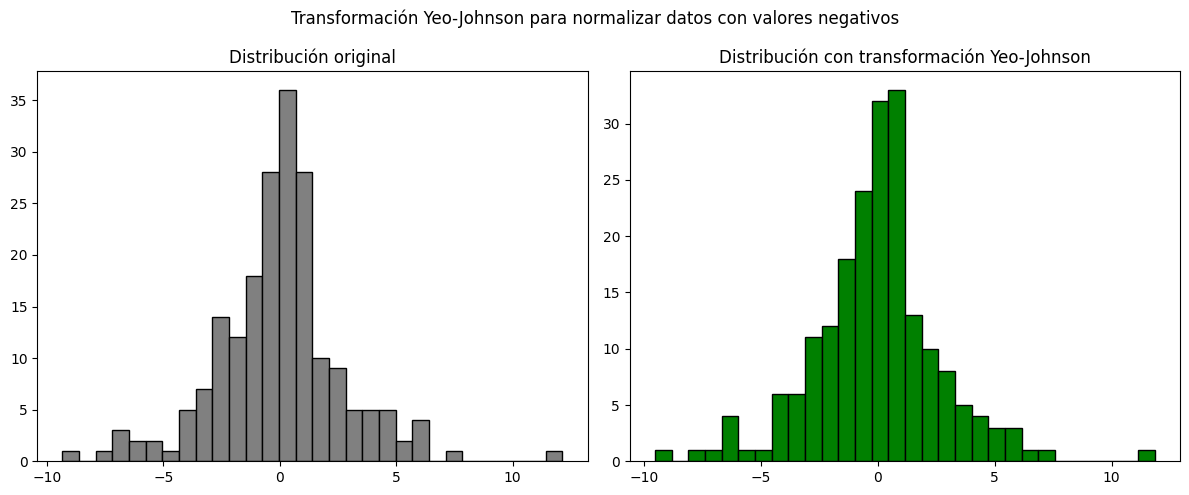

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Simular datos con distribución sesgada (positivos y negativos)
np.random.seed(0)
X = np.random.laplace(loc=0.0, scale=2.0, size=(200, 1))  # distribución sesgada con valores negativos

# Aplicar transformación Yeo-Johnson
transformador = PowerTransformer(method='yeo-johnson', standardize=False)
X_yeojohnson = transformador.fit_transform(X)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X, bins=30, color='gray', edgecolor='black')
plt.title('Distribución original')

plt.subplot(1, 2, 2)
plt.hist(X_yeojohnson, bins=30, color='green', edgecolor='black')
plt.title('Distribución con transformación Yeo-Johnson')

plt.suptitle('Transformación Yeo-Johnson para normalizar datos con valores negativos')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>¿Cuándo se usa?</b>

- Para mejorar la normalidad de una variable.
- Para reducir la asimetría y estabilizar la varianza antes de aplicar modelos estadísticos o de machine learning.
- Es útil antes de aplicar modelos que asumen normalidad o varianza constante, como regresión lineal, ANOVA o PCA.
</div>

Sesgo antes de la transformación: 1.87
Sesgo después de Yeo-Johnson:     0.07


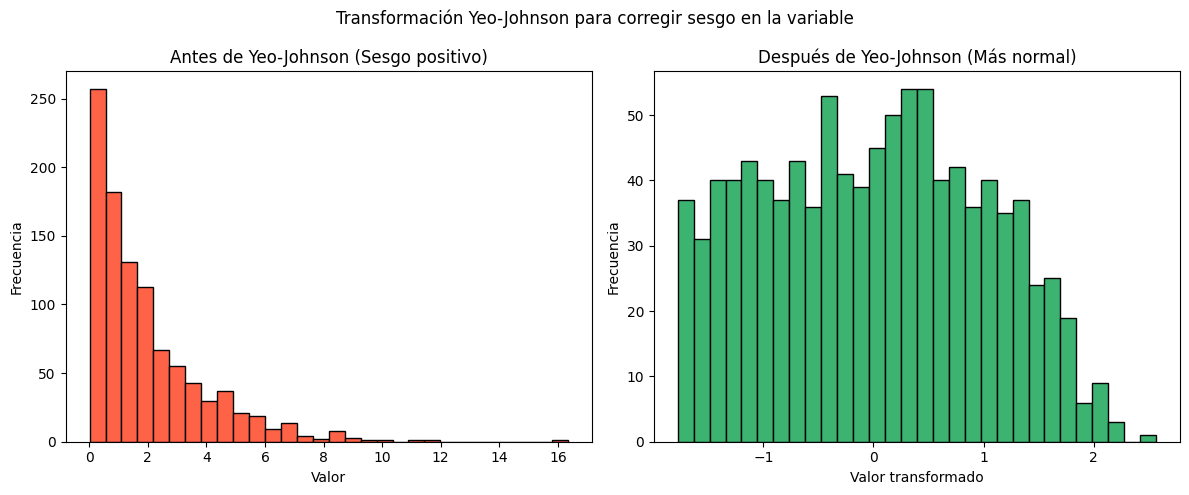

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

# Simular datos con fuerte sesgo positivo
np.random.seed(42)
data = np.random.exponential(scale=2.0, size=1000)  # distribución muy sesgada

# Calcular sesgo antes
skew_original = skew(data)

# Aplicar transformación Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson')
data_transformed = transformer.fit_transform(data.reshape(-1, 1)).flatten()

# Calcular sesgo después
skew_transformed = skew(data_transformed)

# Mostrar sesgo
print(f"Sesgo antes de la transformación: {skew_original:.2f}")
print(f"Sesgo después de Yeo-Johnson:     {skew_transformed:.2f}")

# Graficar histogramas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='tomato', edgecolor='black')
plt.title('Antes de Yeo-Johnson (Sesgo positivo)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(data_transformed, bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Después de Yeo-Johnson (Más normal)')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')

plt.suptitle('Transformación Yeo-Johnson para corregir sesgo en la variable')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Observa qué:</b>

- El primer histo-grama muestra una distribución sesgada a la derecha (cola larga).
- El segundo histograma muestra una distribución más simétrica.
- Los valores de sesgo (skewness) antes y después confirman la mejora.
</div>

Sesgo original:       1.865
Sesgo con Box-Cox:    -0.055 (λ = 0.246)
Sesgo con Yeo-Johnson:0.069


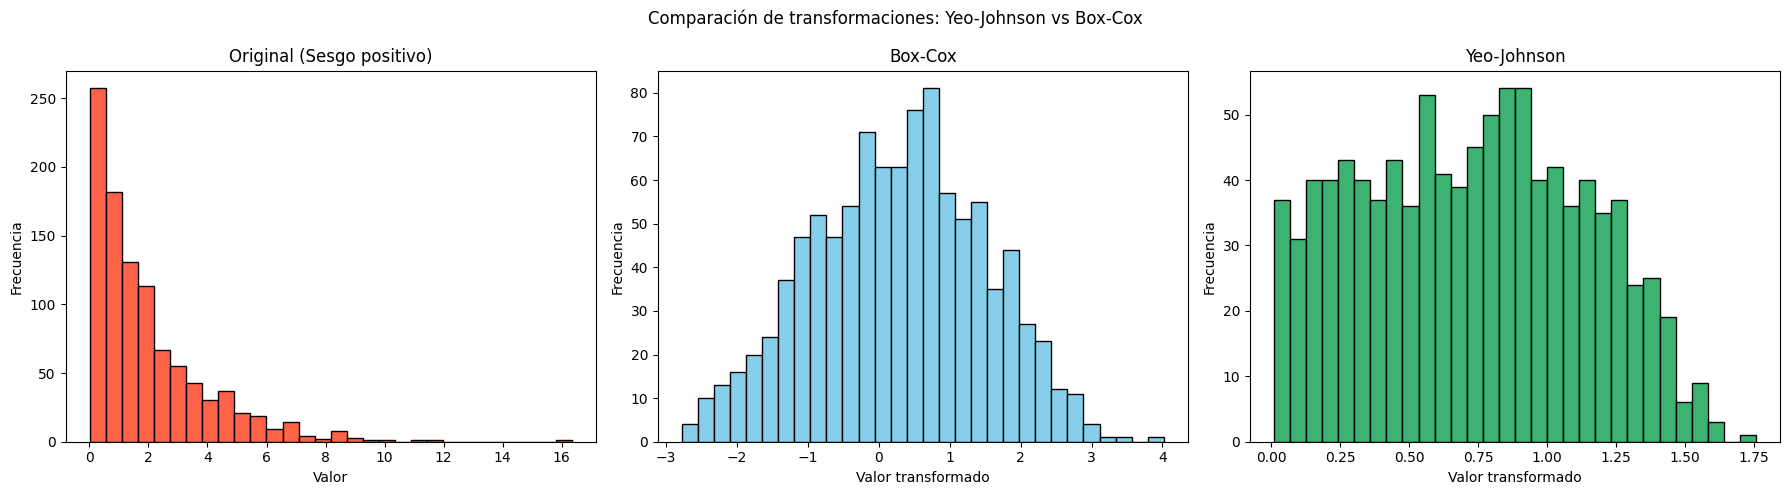

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox, skew

# Simular datos sesgados positivos
np.random.seed(42)
data = np.random.exponential(scale=2.0, size=1000)  # distribución sesgada positiva

# Aplicar Box-Cox (requiere datos > 0)
data_boxcox, lambda_boxcox = boxcox(data)
skew_boxcox = skew(data_boxcox)

# Aplicar Yeo-Johnson (permite ceros y negativos)
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
data_yeojohnson = transformer.fit_transform(data.reshape(-1, 1)).flatten()
skew_yeojohnson = skew(data_yeojohnson)

# Sesgo original
skew_original = skew(data)

# Mostrar sesgos
print(f"Sesgo original:       {skew_original:.3f}")
print(f"Sesgo con Box-Cox:    {skew_boxcox:.3f} (λ = {lambda_boxcox:.3f})")
print(f"Sesgo con Yeo-Johnson:{skew_yeojohnson:.3f}")

# Graficar histogramas
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(data, bins=30, color='tomato', edgecolor='black')
plt.title('Original (Sesgo positivo)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(data_boxcox, bins=30, color='skyblue', edgecolor='black')
plt.title('Box-Cox')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(data_yeojohnson, bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Yeo-Johnson')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')

plt.suptitle('Comparación de transformaciones: Yeo-Johnson vs Box-Cox')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Observa qué:</b>

- Ambas transformaciones reducen el sesgo y acercan la variable a una distribución normal.
- Box-Cox suele ser más precisa si los datos son estrictamente positivos.
- Yeo-Johnson es más flexible: funciona con ceros y negativos.
</div>

## <span style="color:#2F749F;">**2.4 Transformación de Raíz Cuadrada y Recíproca**</span>

Estas transformaciones son opciones simples y efectivas para **reducir la variabilidad** y **moderar los valores extremos** en variables con sesgo positivo:

### 🔸 **Raíz Cuadrada**

$$
x' = \sqrt{x}
$$  

Reduce la **asimetría positiva** (cola derecha), puede ser útil cuando la **varianza aumenta con la media** y requiere que x ≥ 0.  


### 🔸 **Recíproca**

$$
x' = \frac{1}{x}
$$  

Reduce la **influencia de valores grandes** y puede **invertir la relación entre variables**.  Requiere que x ≠ 0; se aplica típicamente a valores positivos.  


La raíz cuadrada se aplica a datos de conteo o variables de baja dispersión, mientras que la recíproca es más agresiva y se usa con datos fuertemente sesgados.  Ambas buscan **mejorar la simetría** y **suavizar la escala** de los datos ([Tabachnick & Fidell, 2019](https://doi.org/10.4324/9781351269388)).


Sesgo original:       1.865
Sesgo raíz cuadrada:  0.598
Sesgo recíproca:      7.966


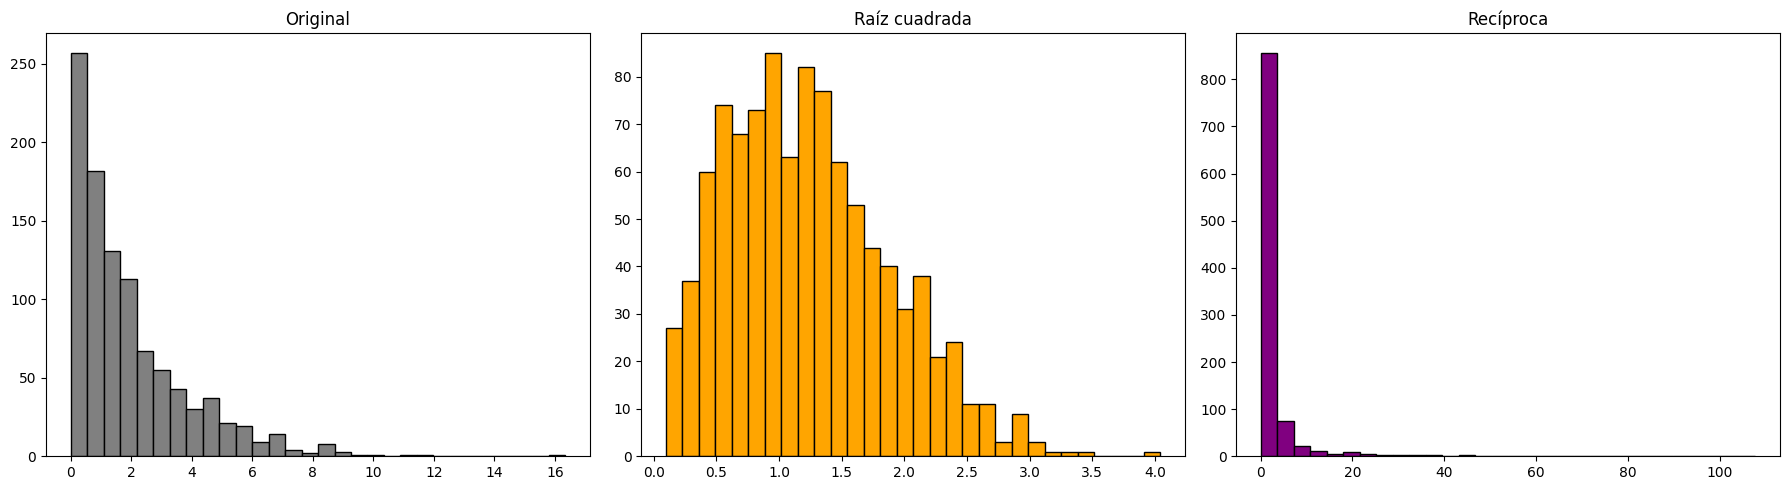

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Simular datos con fuerte sesgo positivo
np.random.seed(42)
x = np.random.exponential(scale=2.0, size=1000)

# Aplicar transformaciones
x_sqrt = np.sqrt(x)
x_recip = 1 / (x + 1e-6)  # evitar división por cero

# Calcular sesgo
skew_orig = skew(x)
skew_sqrt = skew(x_sqrt)
skew_recip = skew(x_recip)

# Mostrar sesgos
print(f"Sesgo original:       {skew_orig:.3f}")
print(f"Sesgo raíz cuadrada:  {skew_sqrt:.3f}")
print(f"Sesgo recíproca:      {skew_recip:.3f}")

# Graficar histogramas
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(x, bins=30, color='gray', edgecolor='black')
plt.title('Original')

plt.subplot(1, 3, 2)
plt.hist(x_sqrt, bins=30, color='orange', edgecolor='black')
plt.title('Raíz cuadrada')

plt.subplot(1, 3, 3)
plt.hist(x_recip, bins=30, color='purple', edgecolor='black')
plt.title('Recíproca')

plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Observa qué:</b>

- La raíz cuadrada suaviza la cola derecha y reduce el sesgo.
- La recíproca invierte la escala: valores grandes se comprimen, valores pequeños se expanden.
</div>

## <span style="color:#2F749F;">**2.5 Transformación Cuadrática y Logarítmica Reflejada**</span>

Estas transformaciones se utilizan principalmente para **corregir la asimetría negativa** (cola izquierda), ampliando los valores pequeños y reduciendo los grandes, con el fin de aproximar la normalidad de la distribución.

### **Transformación Cuadrática**

$$
x' = x^2
$$  

Aumenta la **asimetría positiva o negativa según el contexto**, y **amplifica las diferencias** entre valores grandes y pequeños.  Suele aplicarse cuando la variable presenta **cola izquierda (asimetría negativa)** o cuando se desea **incrementar la varianza** en los valores altos.  


###  **Transformación Logarítmica Reflejada**

$$
x' = \log(\text{máx}(x) + 1 - x)
$$  

Permite **aplicar la transformación logarítmica a variables con asimetría negativa**, reflejando los datos alrededor de su máximo antes de aplicar el logaritmo.  Requiere que los valores de \( x \) sean menores o iguales a un máximo definido.  


Ambas transformaciones son útiles cuando las variables presentan **cola izquierda** y se busca **simetrizar la distribución** antes del modelado estadístico o de aprendizaje automático ([Osborne, 2010](https://doi.org/10.1007/s11336-010-9209-9)).


Sesgo original:         -1.865
Sesgo con x²:           -0.837
Sesgo con log reflejado:0.425


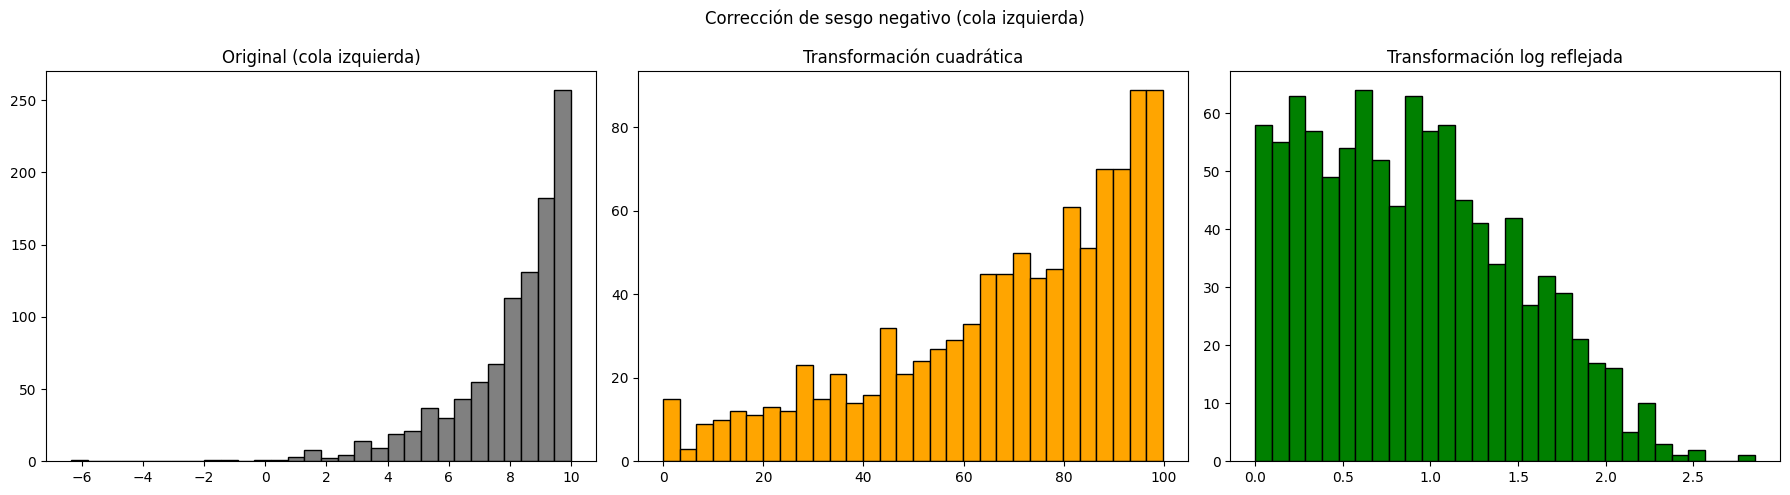

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Simular datos con sesgo negativo (cola izquierda)
np.random.seed(42)
x = -np.random.exponential(scale=2.0, size=1000) + 10  # mayoría de valores altos, cola hacia la izquierda

# Transformación: elevar al cuadrado
x_squared = x ** 2

# Transformación: reflejar y aplicar log
x_reflected_log = np.log(np.max(x) - x + 1)

# Calcular sesgo
print(f"Sesgo original:         {skew(x):.3f}")
print(f"Sesgo con x²:           {skew(x_squared):.3f}")
print(f"Sesgo con log reflejado:{skew(x_reflected_log):.3f}")

# Graficar
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(x, bins=30, color='gray', edgecolor='black')
plt.title('Original (cola izquierda)')

plt.subplot(1, 3, 2)
plt.hist(x_squared, bins=30, color='orange', edgecolor='black')
plt.title('Transformación cuadrática')

plt.subplot(1, 3, 3)
plt.hist(x_reflected_log, bins=30, color='green', edgecolor='black')
plt.title('Transformación log reflejada')

plt.suptitle('Corrección de sesgo negativo (cola izquierda)')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Observa qué:</b>

- Se puede reducir el sesgo negativo.
- Los datos se ajustan mejor a modelos que requieren normalidad.
- Siempre analiza el sesgo antes y después para elegir la mejor transformación.
</div>

## <span style="color:#2F749F;">**2.6 Transformación Logit**</span>

La **transformación logit** se utiliza cuando los datos son **proporciones o probabilidades** dentro del rango (0, 1). Permite mapear estos valores a un rango continuo entre \(-\infty\) y \(+\infty\), lo que facilita su análisis en modelos lineales.

$$
x' = \log\left(\frac{x}{1 - x}\right)
$$

Esta transformación **acentúa las diferencias** entre valores extremos (cercanos a 0 o 1) y es ampliamente utilizada en **regresiones logísticas** y **análisis de proporciones** ([Hosmer, Lemeshow, & Sturdivant, 2013](https://doi.org/10.1002/9781118548388)).








Probabilidades (p) y su transformación logit:
p = 0.01 → logit(p) = -4.60
p = 0.21 → logit(p) = -1.35
p = 0.40 → logit(p) = -0.39
p = 0.60 → logit(p) = 0.40
p = 0.80 → logit(p) = 1.36


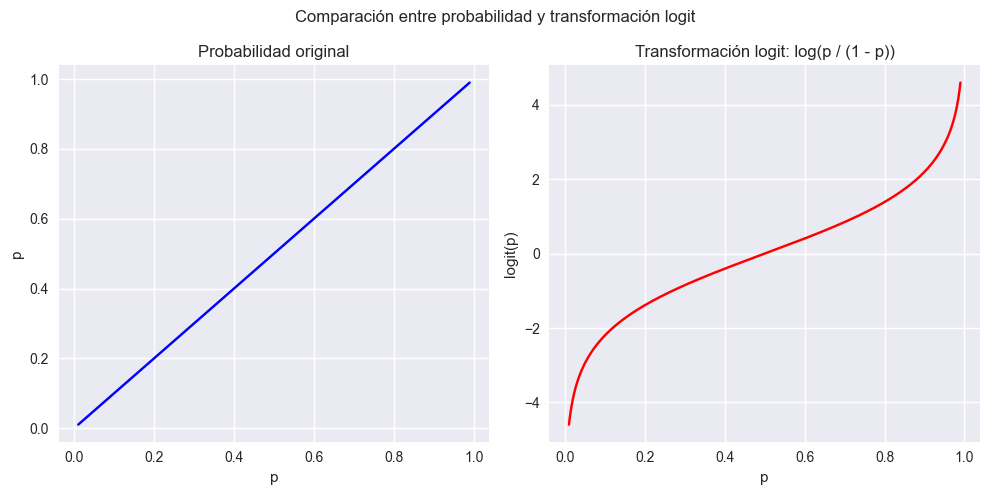

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar variable de probabilidades entre 0.01 y 0.99
p = np.linspace(0.01, 0.99, 500)
logit_p = np.log(p / (1 - p))

# Mostrar algunos valores antes y después de la transformación
print("Probabilidades (p) y su transformación logit:")
for i in range(0, 500, 100):
    print(f"p = {p[i]:.2f} → logit(p) = {logit_p[i]:.2f}")

# Graficar ambas curvas
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 5))

# Curva de probabilidad original
plt.subplot(1, 2, 1)
plt.plot(p, p, color='blue')
plt.title('Probabilidad original')
plt.xlabel('p')
plt.ylabel('p')
plt.grid(True)

# Curva transformada con logit
plt.subplot(1, 2, 2)
plt.plot(p, logit_p, color='red')
plt.title('Transformación logit: log(p / (1 - p))')
plt.xlabel('p')
plt.ylabel('logit(p)')
plt.grid(True)

plt.suptitle('Comparación entre probabilidad y transformación logit')
plt.tight_layout()
plt.show()


<div style="background-color:#fff9c4; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Observa qué:</b>

- La gráfica izquierda muestra la relación identidad 𝑝 contra sí mismo.
- La gráfica derecha muestra cómo la transformación logit:
  - Expande los extremos (valores cercanos a 0 o 1).
  - Linealiza el centro (alrededor de 𝑝=0.5).
</div>